## Exploratory Data Analysis and Visualization
Here, we do some preliminary data exploration. First, we import packages and do a train/test split on the records with a PA form. We stratify on the results of the PA form (approved/denied).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes
from sklearn.model_selection import train_test_split

In [2]:
cmm = pd.read_csv("Data/CMM.csv")

In [3]:
cmm_pa = cmm[cmm['dim_pa_id'].notna()]
cmm_pa_train, cmm_pa_test = train_test_split(cmm_pa, test_size = 0.2, 
                                             random_state = 10475, shuffle = True,
                                            stratify = cmm_pa.pa_approved)

We should only look at cmm_pa_train from this point.

We also compute how is_approved correlates with some other discrete variables. 

## pa_approved vs correct_diagnosis
Let's compute the correlation of pa_approved with correct diagnosis. 

In [4]:
#An auxilliary function to find the percentage of df[column1 == val1] given that df[column2 == val2 ]. 
def percentage_given(df, column1, val1, column2, val2):
    intersection = np.sum(np.logical_and(df[column1] == val1,df[column2] == val2));
    total = np.sum(df[column2] == val2);
    return np.round(100*intersection/total,3);

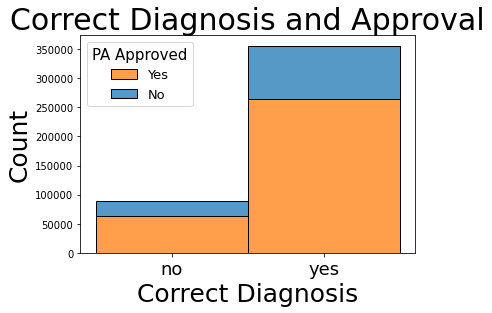

In [5]:
plt.figure()
sns.histplot(cmm_pa_train, x='correct_diagnosis', hue = 'pa_approved',multiple = 'stack',discrete=True)
plt.xticks(ticks=[0,1], labels=["no","yes"],fontsize=18)
plt.title("Correct Diagnosis and Approval",fontsize = 30)
plt.xlabel("Correct Diagnosis",fontsize=25)
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)


plt.show()

In [6]:
print("The percentage of people whose PA is approved given that their diagnosis is correct is: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'correct_diagnosis',1))

print("The percentage of people whose PA is approved given that their diagnosis is incorrect is: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'correct_diagnosis',0))

The percentage of people whose PA is approved given that their diagnosis is correct is:  74.211
The percentage of people whose PA is approved given that their diagnosis is incorrect is:  70.379


## pa_approved vs contraindication
Now we compute the correlation between pa_approved and contraindication

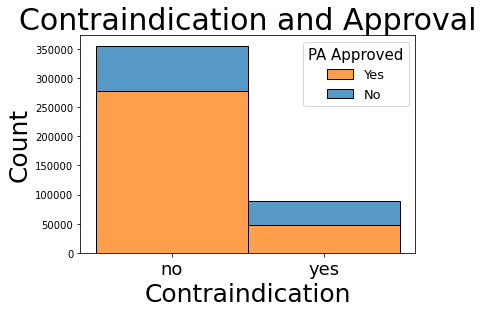

In [7]:
plt.figure()
sns.histplot(cmm_pa_train, x='contraindication', hue = 'pa_approved',multiple = 'stack',discrete=True)
plt.xticks(ticks=[0,1], labels=["no","yes"],fontsize=18)
plt.title("Contraindication and Approval",fontsize = 30)
plt.xlabel("Contraindication",fontsize=25)
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)

plt.show()


In [8]:
print("The percentage of people whose PA is approved given contraindication: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'contraindication',1))

print("The percentage of people whose PA is approved given no contraindication: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'contraindication',0))

The percentage of people whose PA is approved given contraindication:  53.851
The percentage of people whose PA is approved given no contraindication:  78.355


## pa_approved vs tried_and_failed


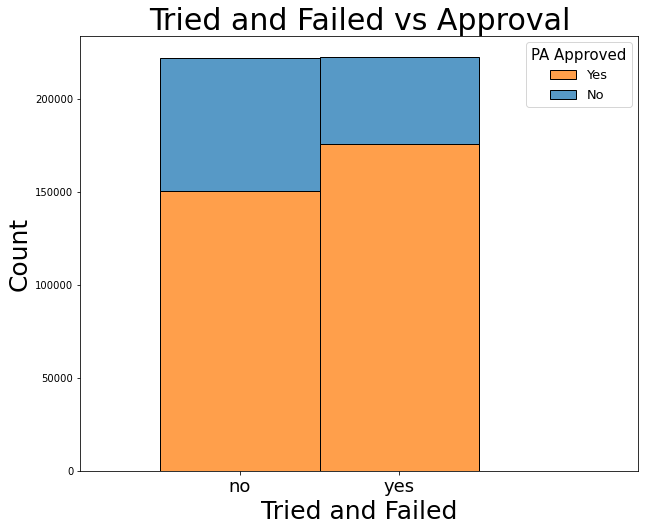

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(cmm_pa_train, x='tried_and_failed', hue = 'pa_approved',multiple = 'stack',discrete=True)
plt.xticks(ticks=[0,1], labels=["no","yes"],fontsize=18)
plt.title("Tried and Failed vs Approval",fontsize = 30)
plt.xlabel("Tried and Failed",fontsize=25)
plt.xlim([-1,2.5])
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)



plt.show()

In [10]:
print("The percentage of people whose PA is approved given that the patient has tried and failed generic alternatives: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'tried_and_failed',1))

print("The percentage of people whose PA is approved given that the patiend has not tried and failed the generic alternative: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'tried_and_failed',0))

The percentage of people whose PA is approved given that the patient has tried and failed generic alternatives:  79.0
The percentage of people whose PA is approved given that the patiend has not tried and failed the generic alternative:  67.867


## pa_approved vs drug 

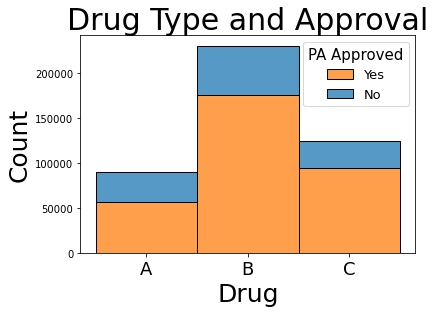

In [11]:
plt.figure()
sns.histplot(cmm_pa_train, x='drug', hue = 'pa_approved',multiple = 'stack')
plt.xticks(ticks=[0,1,2], labels=["A","B","C"],fontsize=18)
plt.title("Drug Type and Approval",fontsize = 30)
plt.xlabel("Drug",fontsize=25)
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)


plt.show()

In [12]:
drugs = ['A', 'B' , 'C']
for drug in drugs:
    print("The percentage of people whose PA is approved given that they use drug ", drug, "is : "
      , percentage_given(cmm_pa_train,'pa_approved',1,'drug',drug))

The percentage of people whose PA is approved given that they use drug  A is :  76.219
The percentage of people whose PA is approved given that they use drug  B is :  75.88
The percentage of people whose PA is approved given that they use drug  C is :  63.044


## pa_approved vs bin

In [13]:
#Takes a long time to run based on payer BIN, because it was a numpy int64. We change type to string,
#as there are only 4 payer BINs.

cmm_pa_train.loc[:,'binS']=cmm_pa_train.loc[:,'bin'].astype(str).copy()

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


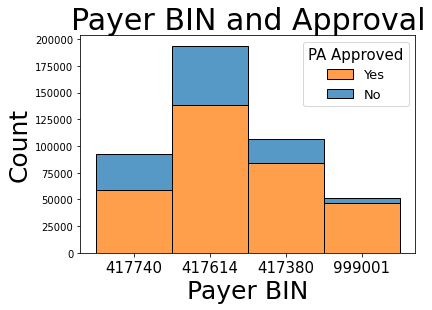

In [14]:
plt.figure()
sns.histplot(cmm_pa_train, x='binS', hue = 'pa_approved',multiple = 'stack')
plt.xticks(fontsize=15)
plt.title("Payer BIN and Approval",fontsize = 30)
plt.xlabel("Payer BIN",fontsize=25)
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)



plt.show()

In [15]:
bins = cmm_pa_train.bin.unique()
for bin in bins:
    print("The percentage of people whose PA is approved given that they use the payer with BIN ", bin, "is : "
      , percentage_given(cmm_pa_train,'pa_approved',1,'bin',bin))

The percentage of people whose PA is approved given that they use the payer with BIN  417740 is :  62.908
The percentage of people whose PA is approved given that they use the payer with BIN  417614 is :  71.13
The percentage of people whose PA is approved given that they use the payer with BIN  417380 is :  78.606
The percentage of people whose PA is approved given that they use the payer with BIN  999001 is :  90.581


## pa_approved vs reject_code

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


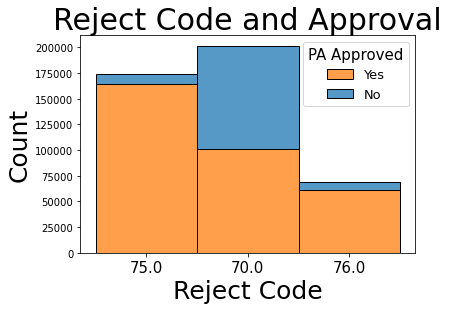

In [16]:
#Change reject code to string
cmm_pa_train.loc[:,'reject_codeS']=cmm_pa_train.loc[:,'reject_code'].astype(str).copy()

plt.figure()
sns.histplot(cmm_pa_train, x='reject_codeS', hue = 'pa_approved',multiple = 'stack')
plt.xticks(fontsize=15)
plt.title("Reject Code and Approval",fontsize = 30)
plt.xlabel("Reject Code",fontsize=25)
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)



plt.show()

In [17]:
reject_codes = cmm_pa_train.reject_code.unique()
for reject_code in reject_codes:
    print("The percentage of people whose PA is approved given that they had reject code", reject_code, "is:"
      , percentage_given(cmm_pa_train,'pa_approved',1,'reject_code',reject_code))

The percentage of people whose PA is approved given that they had reject code 75.0 is: 94.8
The percentage of people whose PA is approved given that they had reject code 70.0 is: 49.912
The percentage of people whose PA is approved given that they had reject code 76.0 is: 88.403


## Same info but different PA approval?

If 2 patients have the same: Payer BIN, Drug, Reject Code, and flags for contraindication, tried and failed, and correct diagnosis, is it possible they could have differing outcomes? (one getting their PA form approved, and the other denied?) Yes. This is the case. Let's look at BIN=417380, Drug A, Reject Code 75, and all flags positive.

In [18]:
A_417380_75_1_1_1=cmm_pa_train[(cmm_pa_train['bin']==417380) & (cmm_pa_train['drug']=='A') &
                               (cmm_pa_train['reject_code']==75) & (cmm_pa_train['contraindication']==1) &
                               (cmm_pa_train['tried_and_failed']==1) & (cmm_pa_train['correct_diagnosis']==1)]
                              

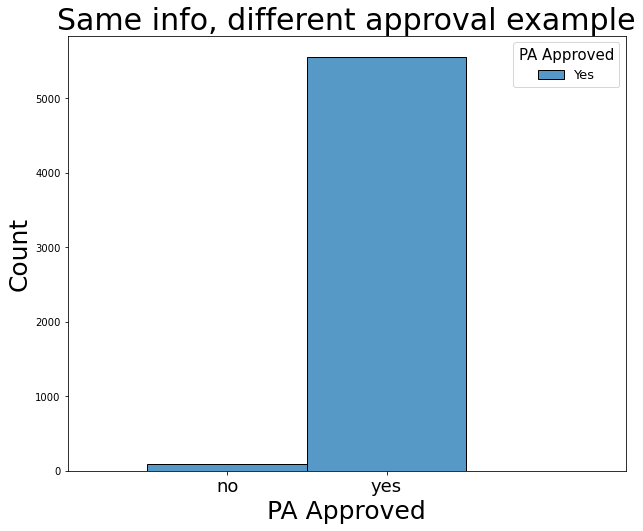

In [19]:
plt.figure(figsize=(10,8))
sns.histplot(A_417380_75_1_1_1, x='pa_approved',discrete=True)
plt.xticks(ticks=[0,1], labels=["no","yes"],fontsize=18)
plt.title("Same info, different approval example",fontsize = 30)
plt.xlabel("PA Approved",fontsize=25)
plt.xlim([-1,2.5])
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)



plt.show()

In [20]:
print("For claims with BIN=417380, Drug A, Reject Code 75, and all flags positive, we have",
      A_417380_75_1_1_1['pa_approved'].value_counts()[0],"PA forms that were denied, and",
     A_417380_75_1_1_1['pa_approved'].value_counts()[1], "PA forms that were approved.")

For claims with BIN=417380, Drug A, Reject Code 75, and all flags positive, we have 95 PA forms that were denied, and 5561 PA forms that were approved.


Now, lets just look at BIN, drug, and reject code. Notice that once we have the BIN and Drug, we know the reject code. So for each payer, each drug is rejected only with one reject code (e.g. Payer 417740 only rejects drug C with code 75). However, we will leave it in for interpretability and generalization - in practice, there will be more payers and drugs, leaving it in will allow us to see how important it is versus drug and bin alone (and other variables).

In [21]:
cmm_pa[['bin','drug','reject_code']].groupby(['bin','drug','reject_code']).size().reset_index(name='Freq')

,bin,drug,reject_code,Freq
0,417380,A,75.0,88486
1,417380,B,76.0,4419
2,417380,C,70.0,40674
3,417614,A,70.0,156497
4,417614,B,75.0,78686
5,417614,C,76.0,7085
6,417740,A,76.0,10817
7,417740,B,70.0,55035
8,417740,C,75.0,50179
9,999001,A,76.0,32492
